In [ ]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
!pip install numpy --upgrade --ignore-installed

  Cache entry deserialization failed, entry ignored
Exception:
Traceback (most recent call last):
  File "C:\Anaconda\lib\site-packages\pip\_vendor\requests\packages\urllib3\response.py", line 232, in _error_catcher
    yield
  File "C:\Anaconda\lib\site-packages\pip\_vendor\requests\packages\urllib3\response.py", line 314, in read
    data = self._fp.read(amt)
  File "C:\Anaconda\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 60, in read
    data = self.__fp.read(amt)
  File "C:\Anaconda\lib\http\client.py", line 449, in read
    n = self.readinto(b)
  File "C:\Anaconda\lib\http\client.py", line 493, in readinto
    n = self.fp.readinto(b)
  File "C:\Anaconda\lib\socket.py", line 586, in readinto
    return self._sock.recv_into(b)
  File "C:\Anaconda\lib\ssl.py", line 1002, in recv_into
    return self.read(nbytes, buffer)
  File "C:\Anaconda\lib\ssl.py", line 865, in read
    return self._sslobj.read(len, buffer)
  File "C:\Anaconda\lib\ssl.py", line 625, in read
  

In [33]:
df = pd.read_excel("C:\\Users\\Subha\\Documents\\8thsem\\OSS\\Sample - Superstore.xls")
furniture = df.loc[df['Category'] == 'Furniture']

In [34]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [35]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [36]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-13', '2014-01-14', '2014-01-16',
               '2014-01-19', '2014-01-20',
               ...
               '2017-12-28', '2017-12-28', '2017-12-28', '2017-12-29',
               '2017-12-29', '2017-12-29', '2017-12-29', '2017-12-29',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=2121, freq=None)

In [37]:
y = furniture['Sales'].resample('MS').mean()

In [38]:
y['2017':]

Order Date
2017-01-01    248.501333
2017-02-01    264.089900
2017-03-01    286.669600
2017-04-01    206.044502
2017-05-01    319.953928
2017-06-01    372.717386
2017-07-01    227.173500
2017-08-01    395.945487
2017-09-01    349.737422
2017-10-01    308.226313
2017-11-01    374.310253
2017-12-01    296.296857
Freq: MS, Name: Sales, dtype: float64

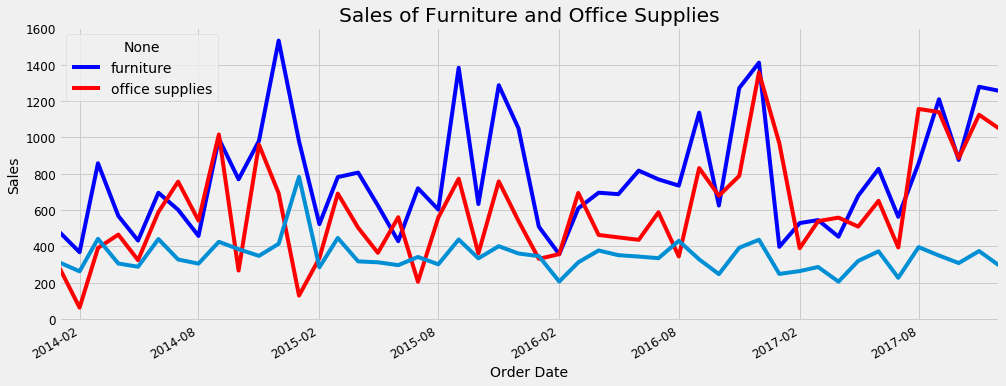

In [39]:
y.plot(figsize=(15, 6))
plt.show()


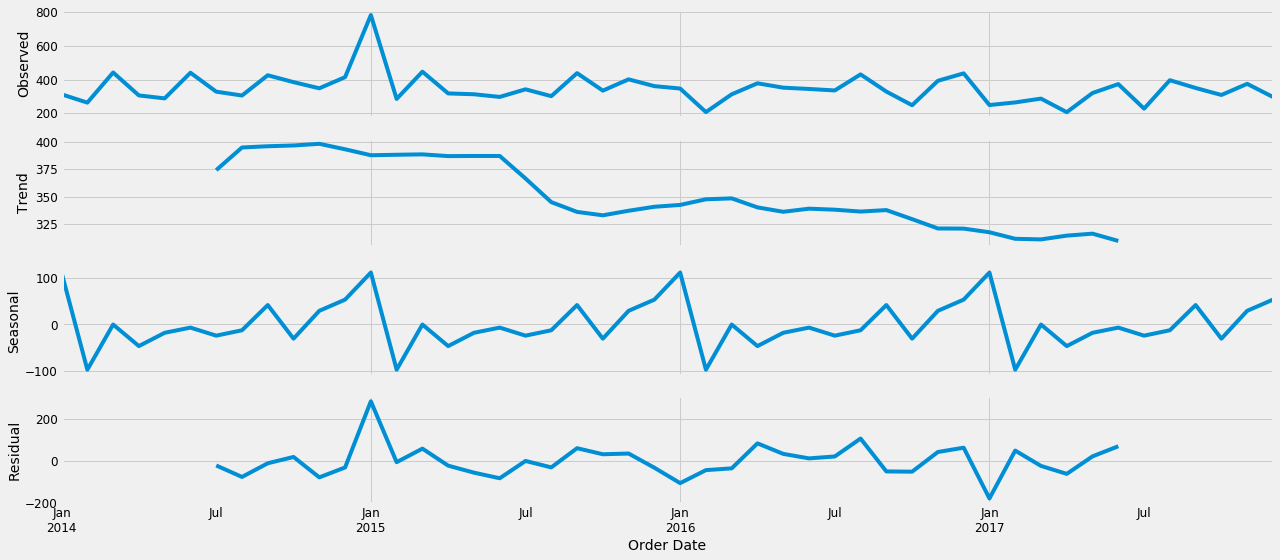

In [40]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [41]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [42]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1508.81926694468
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:452.8238602501691
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:421.1756110053346
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:295.446456472235
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:641.1240680665791
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3386.556714972906
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:416.5496453364603
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:455.09859949049275
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:411.5742047425089
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:297.44640662502263
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1451.7472094908717
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:437.46040107889746
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:405.2070998803185
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:294.1158452476943
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:538.8964721447171
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2616.39248093298
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:412.8726989905177
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:419.1839792724932
ARIMA(0, 

In [43]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0771      0.259     -0.298      0.766      -0.584       0.430
ma.L1         -1.0000      0.434     -2.305      0.021      -1.850      -0.150
ar.S.L12      -0.0007      0.029     -0.025      0.980      -0.057       0.056
sigma2      6323.9741   6.86e-05   9.22e+07      0.000    6323.974    6323.974


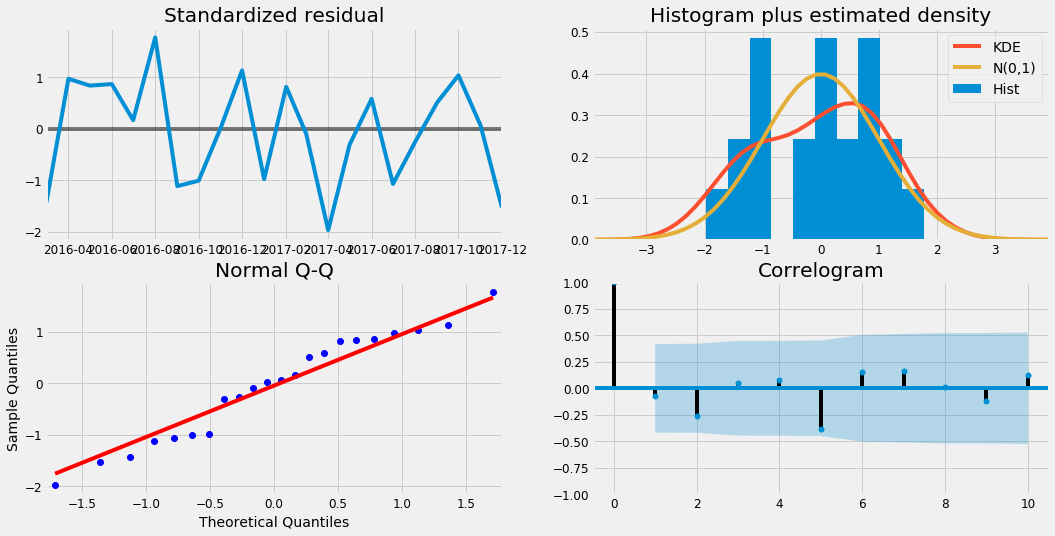

In [44]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

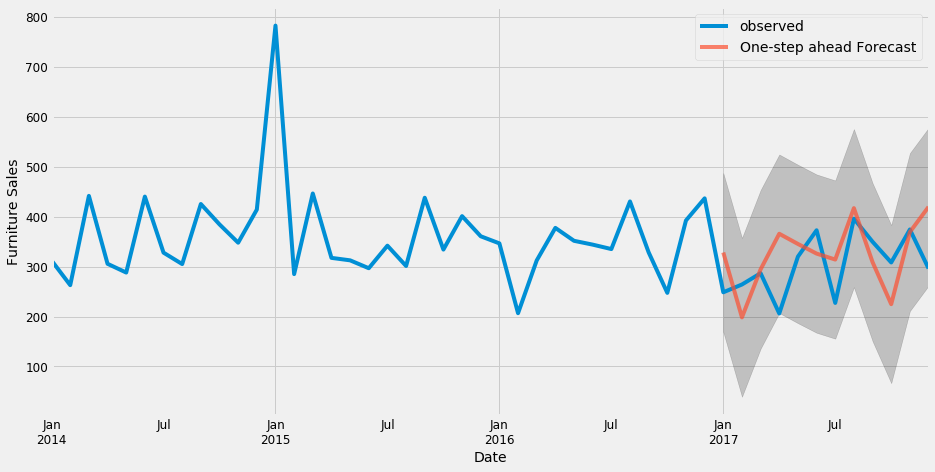

In [45]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [46]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 5911.26


In [47]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 76.88


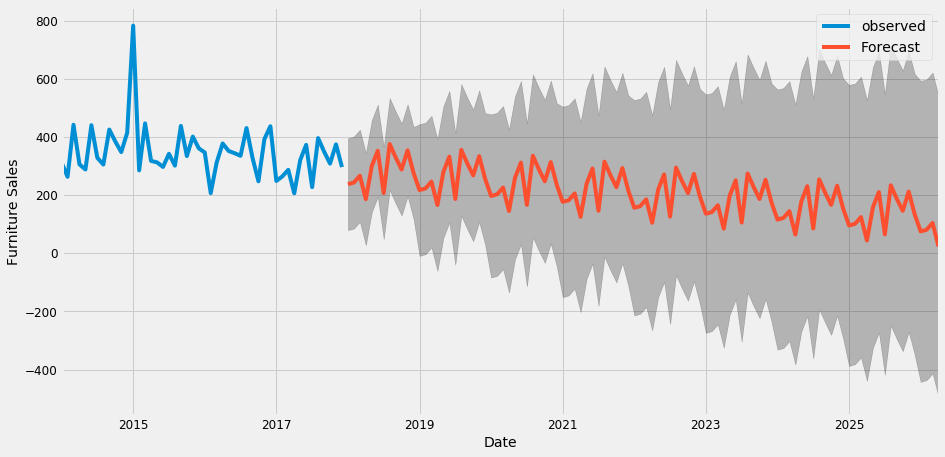

In [48]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [49]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']

In [50]:
furniture.shape, office.shape

((2121, 21), (6026, 21))

In [51]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

In [52]:
furniture.head()

,Order Date,Sales
0,2014-01-06,2573.820
1,2014-01-07,76.728
2,2014-01-10,51.940
3,2014-01-11,9.940
4,2014-01-13,879.939


In [53]:
office.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


In [54]:
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


In [55]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

In [56]:
first_date = store.ix[np.min(list(np.where(store['office_sales'] > store['furniture_sales'])[0])), 'Order Date']

print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2014-07-01.


In [59]:
from fbprophet import Prophet

furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)

office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

ModuleNotFoundError: No module named 'fbprophet'

In [58]:
!pip install fbprophet

  Using cached https://files.pythonhosted.org/packages/f7/86/4509e952f9724f084625e93e0bf8d8519b25c79029a0a916b0f996644c75/fbprophet-0.6.tar.gz
  Using cached https://files.pythonhosted.org/packages/e3/a7/6d045520e6ad11cf630b483f02a0645e743fcc7f75c28fd344c769100203/cmdstanpy-0.4.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/7c/8b/b008aed4988f8eefbf1f5bbbdabcf4cd8ca4e9965d55121e755303ed5d82/pystan-2.19.1.1-cp36-cp36m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/ab/e0/a52ffc02395474858552ca6437226e23ad67e25fd85cb387f02e479cfe01/LunarCalendar-0.0.9-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c9/f8/02a18000b0fbfd714f78aa16359796727a181e80f679682e3f62771a5c23/convertdate-2.2.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/05/97/dd99fa9c0d9627a7b3c103a00f1566d8193aca8d473884ed258cca82b06f/setuptools_git-1.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/5d

  Failed building wheel for fbprophet
Command "C:\Anaconda\python.exe -u -c "import setuptools, tokenize;__file__='C:\\Users\\Subha\\AppData\\Local\\Temp\\pip-build-acye3xab\\fbprophet\\setup.py';f=getattr(tokenize, 'open', open)(__file__);code=f.read().replace('\r\n', '\n');f.close();exec(compile(code, __file__, 'exec'))" install --record C:\Users\Subha\AppData\Local\Temp\pip-aptg5h3j-record\install-record.txt --single-version-externally-managed --compile" failed with error code 1 in C:\Users\Subha\AppData\Local\Temp\pip-build-acye3xab\fbprophet\
You are using pip version 9.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.
